# Group HWA1 - 5

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Parameters
S_0 = 1
r = 0.05
sigma = 0.2
K = 1
M = 200
T = 1
N = 1000
t_values = [m * T / M for m in range(1, M + 1)]
t_values.insert(0, 0)

In [5]:
np.random.seed(3407)
def get_S_values(S_0,r,sigma,K):
    S_values = [S_0]
    Z = np.random.normal(0,1,M+1)
    #Z = np.random.normal(0,1)
    for m in range(1,M+1):
        S_value = S_values[m-1] * np.exp((r - 0.5*sigma**2)*(t_values[m] - t_values[m-1]) + sigma * np.sqrt(t_values[m] - t_values[m-1])* Z[m])
        #S_value = S_values[m-1] * np.exp((r - 0.5*sigma**2)*(t_values[m] - t_values[m-1]) + sigma * np.sqrt(t_values[m] - t_values[m-1])* Z)
        S_values.append(S_value)
    return S_values

S = get_S_values(S_0,r,sigma,K)

In [6]:
Asian_option_values = []
def  get_Asian_option_values(S,r,T,M,K):
    Asian_option_value = np.exp(-r*T)*np.maximum(np.mean(S)-K,0)
    return Asian_option_value

for i in range(0,N):
    S = get_S_values(S_0,r,sigma,K)
    Asian_option_values.append(get_Asian_option_values(S,r,T,M,K))

In [7]:
Asian_option_values = np.array(Asian_option_values)
Asian_option_values.mean()
print(f'Asian_option_value:{Asian_option_values.mean()}')
Variance = 1/(N-1)*np.sum((Asian_option_values - Asian_option_values.mean())**2)
print(f'Varaince:{Variance}')
Standerd_Error = np.sqrt(Variance/N)
print(f'Standerd_Error:{Standerd_Error}')

Asian_option_value:0.062496977610974835
Varaince:0.007053986646557547
Standerd_Error:0.002655934232347922


In [8]:
def confidence_interval(alpha,Asian_option_values):
    z = 1.96
    mean = Asian_option_values.mean()
    N = len(Asian_option_values)
    standerd_error = np.sqrt(Variance/N)
    lower_bound = mean - z*standerd_error
    upper_bound = mean + z*standerd_error
    return lower_bound,upper_bound

In [9]:
print(f'CI={confidence_interval(0.05,Asian_option_values)}')

CI=(0.05729134651557291, 0.06770260870637676)


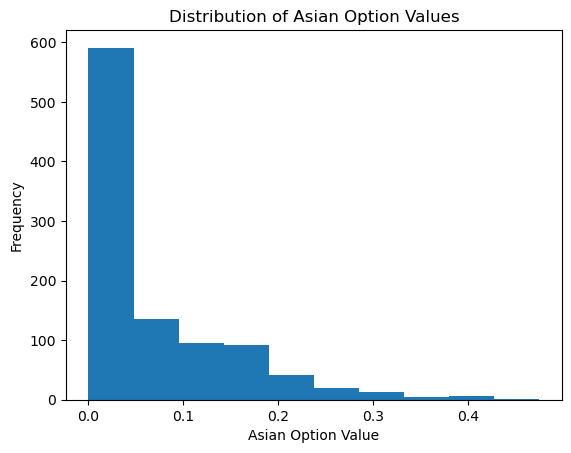

In [10]:
import matplotlib.pyplot as plt
plt.hist(Asian_option_values, bins=10)
plt.title("Distribution of Asian Option Values")
plt.xlabel("Asian Option Value")
plt.ylabel("Frequency")
plt.show()